<a href="https://colab.research.google.com/github/langelmc27/EDP-1/blob/main/Gr%C3%A1ficas_de_las_soluciones_de_los_problemas_del_examen_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Morales Cruz Luis Angel

Este programa sera utilizado para ver de manera grafica como funcionan las series de fourier y poder compararla con la función real.

Ejercicio a realizar: 1
Problema del Examen: 2

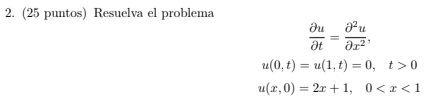

In [ ]:
# ====================================== #
# Realizamos la importación de librerias
# ====================================== #

from pylab import *
from mpl_toolkits.mplot3d import Axes3D


# ========= #
# FUNCIONES
# ========= #

# =============================================================================================== #
# Creamos una función que hara una linea recta y=x, dando un array que contienen los valores de X
# =============================================================================================== #

def funcion(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = (2*x[i])+1
    return y

# ====================== #
# Serie de Fourier sin t
# ====================== #

#Podemos pedirle al usuario que nos diga cuantos armonicos quiere realizar o podemos ingresarlos manualmente con el N dentro de la función, pero la segunda es mas comoda para uso personal

def u_0(x,N=20): # N es el número de armónicos
    #Array de la funcion series fourier
    f = zeros(len(x))
    #Realizamos la creación de la serie de fourier
    for n in range(1,N):
        f += (2/(n*pi)) * (1-(3*pow(-1,n))) * sin(n*pi*x) #* exp(-t * pow(n*pi,2))
    return f

# ====================== #
# Serie de Fourier con t
# ====================== #

def u_x_t(x,t,N=50):
    #Generamos una matriz de nxn
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (2/(n*pi)) * (1-(3*pow(-1,n))) * sin(n*pi*x) * exp(-t[i] * pow(n*pi,2))
    return f


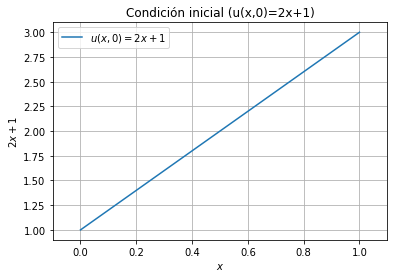

In [ ]:
# ================== #
# Ya que 0<x<1 y t>0
# ================== #

#Intervalo de x=[0,1], generando un array de 1,000 puntos
x = linspace(0,1,1000)
#Intervalo de t>0, ya que no podemos hacer infinitos usaremos un limite superior de 10, generando un array de 1,000 puntos
t = linspace(0,10,1000)

#Llamamos a la función
f = funcion(x)
#Realizamos el ploteo, aqui ya cambiamos ciertos datos, podemos decir que f(x)=y=2x+1
plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$2x+1$'); 
plt.title("Condición inicial (u(x,0)=2x+1)")
xlim([-0.1,1.1]),ylim([0.9,3.1]),grid(),legend()
show()

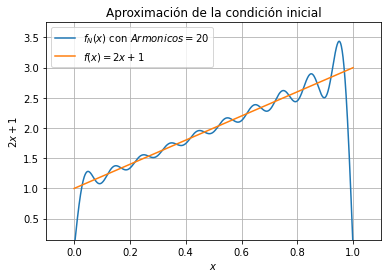

In [ ]:
# ===================================================================================================================== #
# Vemos el comportamiento sin la variable del tiempo que es exp(-t*pow(n*pi,2)) y por ello esta comentada en la funcion
# ===================================================================================================================== #

#Llamamos a la función sin el tiempo y la asiganmos a otra variable
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $Armonicos=20$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$2x+1$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([0.15,3.75]),grid(),legend()
show()

#Podemos observar como los extremos oscilan o se comportan de una manera poco inusual

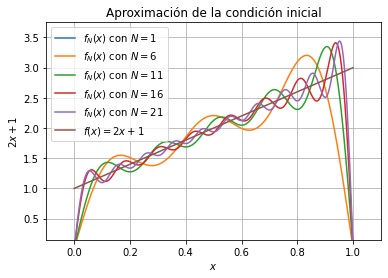

In [ ]:
# ========================================================================================== #
# Vemos el comportamiento sin la variable del tiempo y ademas con una cantidad distinta de N
# ========================================================================================== #

for i in range(1,25,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$2x+1$'); 
plot(x,f,label='$f(x)=2x+1$')
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([0.15,3.75]),grid(),legend()
show()

#Podemos observar como se asemeja un poco mas a la f(x) original, mientras la N sea mas grande

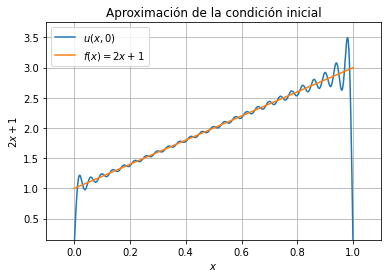

In [ ]:
# ====================== #
# Serie de Fourier con t
# ====================== #

#Llamamos a la funcion y la almacenamos en una variable
U = u_x_t(x,t)
#Hacemos el plot, con N=50 y t=0
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$2x+1$');
plot(x,f,label='$f(x)=2x+1$')
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([0.15,3.75]),grid(),legend()
show()

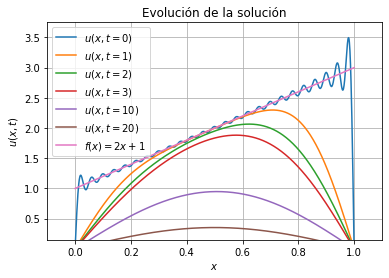

In [ ]:
# ============================= #
# Serie de Fourier con varias t
# ============================= #

#Cada vez te aumenta 0<t<=20
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plot(x,f,label='$f(x)=2x+1$')
plt.title("Evolución de la solución")
xlim([-0.1,1.1]),ylim([0.15,3.75]),grid(),legend()
show()

#Vemos que conforme las t aumente, estas tenderan al valor de 0 como en las condiciones a las que esta sujeto la ecuación

Aqui si la verdad no se como funciona el ploteo en 3D pero confio en usted profe :D, tampoco le movi al tiempo por lo mismo

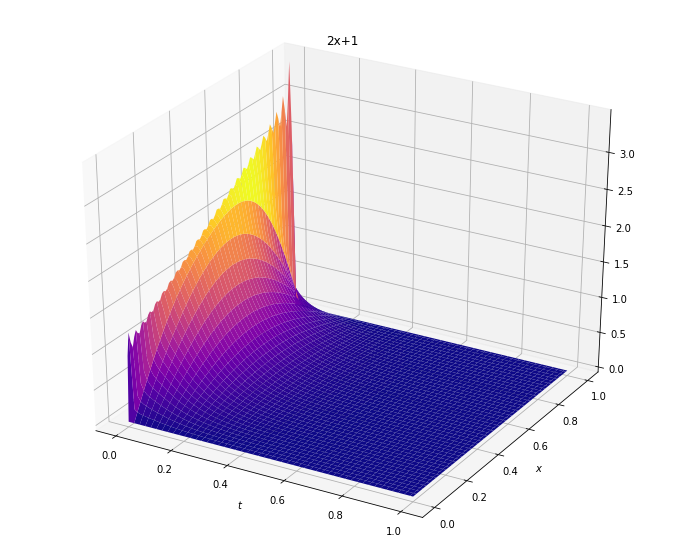

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

#Generemos nuevos arrays de x y t, para que el ploteo sea claro y se vea de mejor manera lo que se quiere mostrar
x = linspace(0,1,100)
t = linspace(0,1,100)
#Realizamos el mallado o matriz de elementos
X,T = np.meshgrid(x,t)
#Llamamos a la función
U = u_x_t(x,t)
#Ploteo
plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("2x+1")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"